In [2]:
#importing pandas library 
import pandas as p

#reading the bollywood csv file as a data frame
x = p.read_csv("bollywood.csv")

#displaying the data frame
x 

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224
...,...,...,...,...,...,...,...,...,...,...
144,145,27-Feb-15,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615
145,146,13-Mar-15,NH10,N,Thriller,13,32.10,5592977,15464,1513
146,147,20-Mar-15,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807
147,148,20-Mar-15,Hunterrr,N,Comedy,5,11.89,4674795,3706,762


## Q.1) How many records are present in the dataset?

In [3]:
#the shape attribute is for checking the actual number of rows and columns inside a dataset or a data frame.
#shape function with parameter as 0 returns the no. of rows where as with 1, returns the no. of columns
x.shape[0]

149

## Q.2) How many movies got released in each genre? Sort number of releases in each genre in descending order.

In [4]:
#method 1 - converting Genre column to a list and accessing elements and store count in a hash map
mov = x["Genre"].values.tolist() #Converting to a list
dict={} #Initialising an empty dictionary
for i in mov: #Iterating in the Genre list
    if i in dict:
        dict[i]=dict[i]+1 #Incrementing the count of the key
    else:
        dict[i]=1 #Creating a new key if does not exists
print("Movies got released in each genre : \n",dict, sep="")

#the issue with this is that Thriller and Action comes twice as they have trailing space so are considered different
#to deal with this, we can use strip function

#in the later part of the question, we have to sort as well, so it's better not to use dictionary

Movies got released in each genre : 
{'Romance': 25, 'Thriller ': 3, 'Comedy': 36, ' Drama ': 35, 'Action ': 3, 'Action': 21, 'Thriller': 26}


In [44]:
#method 2 - firstly use the str.strip() method to remove the leading and trailing spaces from all the entries in Genre column
f = x["Genre"].str.strip() #a is a data frame with just the values of Genre column with removed leading and trailing spaces

#The value_counts() function returns the series containing counts of unique values. 
#The resulting object will be in descending order so that the first element is the most frequently occurring element.

f.value_counts(ascending=True) #value_counts to count and giving the value of ascending as True to sort in ASCENDING order
#if i don't give any parameter then by default DESCENDING


Action      24
Romance     25
Thriller    29
Drama       35
Comedy      36
Name: Genre, dtype: int64

## Q.3) Which genre had highest number of releases?

In [45]:
print("Genre which had the highest number of releases are : ")

#nlargest() method is used to get n largest values from a data frame or a series.
f.value_counts(ascending=True).nlargest(n=1)


Genre which had the highest number of releases are : 


Comedy    36
Name: Genre, dtype: int64

## Q.4) How many movies in each genre got released in different release times like long weekend, festive season, etc. 


In [46]:
#creating a cross tab between the genre and release time
p.crosstab(f, x.ReleaseTime) #a is the data frame which has Genres with stripped fields.

ReleaseTime,FS,HS,LW,N
Genre,,,,
Action,3,3,3,15
Comedy,3,5,5,23
Drama,4,6,1,24
Romance,3,3,4,15
Thriller,4,1,2,22


## Q.5) Which month of the year, maximum number movie releases are seen? 

In [25]:
x['Month']=p.DatetimeIndex(x['Release Date']).month 
#convert object data type to date time type

x['Month'].value_counts()
x['Month'].value_counts().idxmax()

1

In [12]:
#hence 1 i.e. January has the maximum number of movie releases.

In [29]:
a=x['Month'].value_counts().idxmax()
#storing the month value in an integer data type --> a

months = [0, "January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
#creating a list --> months which will have the month name with the month number associated to it

print(months[a], "has the maximum  of movie releases")
#printing the month name

January has the maximum number movie releases


## Q.6) Which month of the year typically sees most releases of high budgeted movies, that is, movies with budget of 25 crore or more?

In [13]:
x[x.Budget>=25].Month.value_counts().idxmax()

2

In [30]:
#answer is 2, i.e., February sees the most releases of high budgeted movies.

In [31]:
a = x[x.Budget>=25].Month.value_counts().idxmax()

#printing the month name with the help of the months list
print(months[a], "typically sees most releases of high budgeted movies")

February typically sees most releases of high budgeted movies


## Q.7) Which are the top 10 movies with maximum return on investment (ROI)? 

In [32]:
budget = x["Budget"].values.tolist() #Budget column to a list
box = x["BoxOfficeCollection"].values.tolist() #BoxOfficeCollection to a list
roi=[] #Creating a new list to store ROI values
for i in range(0, len(box)): 
    roi.append((box[i] - budget[i])/budget[i]) #Calculating ROI and adding it to the list
x = x.assign(ROI=roi) #Adding a new column to the data frame

#Sorting the data frame by ROI column in descending order
#Using head() method, displaying the top 10 movies with highest ROI
x.sort_values(by='ROI', ascending=False).head(n=10)

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Month,ROI
64,65,26-Apr-13,Aashiqui 2,N,Romance,12,110.0,2926673,4944,628,4,8.166667
89,90,19-Dec-14,PK,HS,Drama,85,735.0,13270623,43767,5693,12,7.647059
132,133,13-Sep-13,Grand Masti,LW,Comedy,35,298.0,1795640,3015,721,9,7.514286
135,136,20-Sep-13,The Lunchbox,N,Drama,10,85.0,1064854,4054,285,9,7.500000
87,88,14-Jun-13,Fukrey,N,Comedy,5,36.2,227912,222,39,6,6.240000
58,59,5-Sep-14,Mary Kom,N,Drama,15,104.0,6086811,26560,1647,9,5.933333
128,129,18-Oct-13,Shahid,FS,Drama,6,40.0,1148516,3155,396,10,5.666667
37,38,11-Jul-14,Humpty Sharma Ki Dulhania,N,Romance,20,130.0,6604595,14535,2208,7,5.500000
101,102,12-Jul-13,Bhaag Milkha Bhaag,N,Drama,30,164.0,2635390,4622,456,7,4.466667
115,116,9-Aug-13,Chennai Express,FS,Comedy,75,395.0,1882346,7954,1593,8,4.266667


## Q.8) Do the movies have higher ROI if they get released on festive seasons or long weekend? Calculate the average ROI for different release times.

In [35]:
for i in x.ReleaseTime.unique():
    print(i," : ",x[x.ReleaseTime==i].ROI.mean())

LW  :  1.1272053098737973
N  :  0.6577216305350877
HS  :  0.8508667840873724
FS  :  0.9738532013595953


In [ ]:
#the average value for LW is the maximum, so the movies released on long weekend have more ROI than the on festice seasons.

## Q.9) Is there a correlation between box office collection and YouTube likes? Is the correlation positive or negative?

<AxesSubplot:xlabel='YoutubeLikes', ylabel='BoxOfficeCollection'>

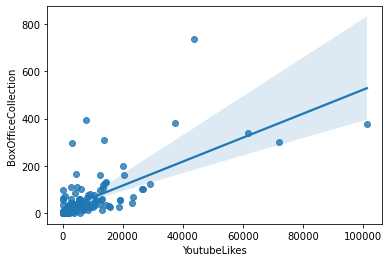

In [38]:
import seaborn as sns

#Best Fit Line
sns.regplot(x='YoutubeLikes',y='BoxOfficeCollection',data=x)

In [ ]:
#since there is a positive slope, there is a POSITIVE correlation

In [39]:
x.YoutubeLikes.corr(x.BoxOfficeCollection)
#finding correlation value

0.6825165877731297

In [40]:
#positive correlation value

## Q.10) Which genre of movies typically sees more YouTube likes? Draw boxplots for each genre of movies to compare.

<AxesSubplot:xlabel='Genre', ylabel='YoutubeLikes'>

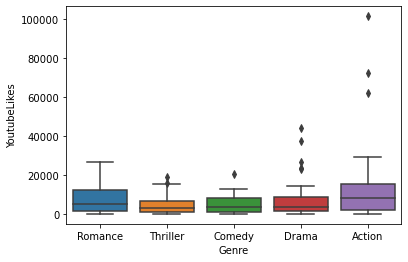

In [49]:
x['Genre']=x.Genre.str.strip() #stripping the leading and trailing spaces
sns.boxplot(data=x,x="Genre",y="YoutubeLikes")

In [ ]:
#So, the genre Action typically sees more Youtube Likes 

## Q.11) Which of the variables among Budget, BoxOfficeCollection, YoutubeView, YoutubeLikes, YoutubeDislikes are highly correlated?

<AxesSubplot:>

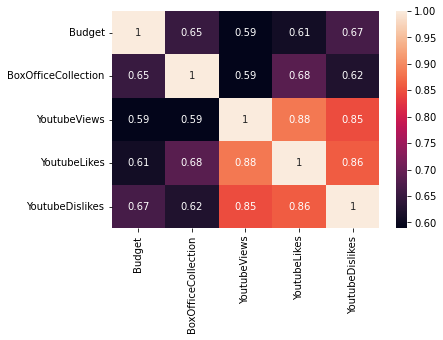

In [50]:
#heatmap
sns.heatmap(x[['Budget','BoxOfficeCollection','YoutubeViews','YoutubeLikes','YoutubeDislikes']].corr(),annot=True)

In [51]:
#Youtube Likes and YouTube Views are highly correlated

## Q.12) During 2013−2015 period, highlight the genre of movies and their box office collection? Visualize with best fit graph.

<AxesSubplot:xlabel='Genre', ylabel='BoxOfficeCollection'>

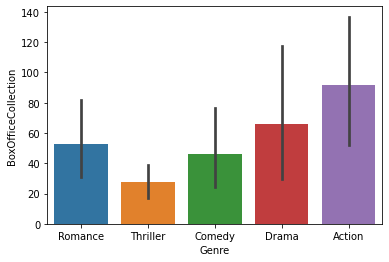

In [73]:
#bar graph of genre and its average box office collection
sns.barplot(data=x,x='Genre',y='BoxOfficeCollection')

## Q.13) Visualize the Budget and Box office collection based on Genre.

<AxesSubplot:xlabel='Genre', ylabel='BoxOfficeCollection'>

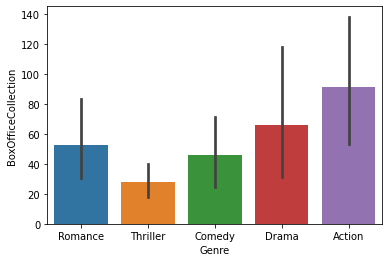

In [70]:
#bar graph of average box office collection per genre
sns.barplot(data=x,x='Genre',y='BoxOfficeCollection')

<AxesSubplot:xlabel='Genre', ylabel='Budget'>

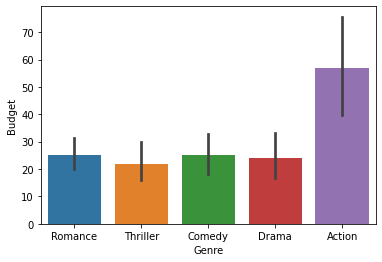

In [74]:
#bar graph of average budget per genre
sns.barplot(data=x,x='Genre',y='Budget')

## Q.14) Find the distribution of movie budget for every Genre.

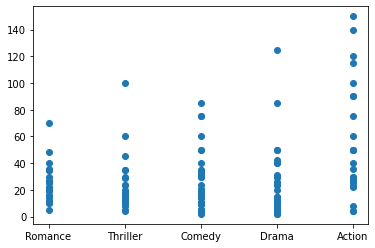

In [60]:
#Distribution of budget per genre
plt.scatter(x.Genre,x.Budget)

## Q.15) During 2013−2015, find the number of movies released in every year. 

In [62]:
x['Year']=p.DatetimeIndex(x['Release Date']).year
x['Year']

0      2014
1      2013
2      2014
3      2013
4      2014
       ... 
144    2015
145    2015
146    2015
147    2015
148    2014
Name: Year, Length: 149, dtype: int64

<AxesSubplot:xlabel='Year'>

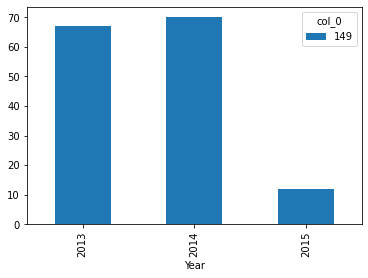

In [66]:
#number of movies releases per year
p.crosstab(x.Year,x.shape[0])

#visualization of number of movies per year
p.crosstab(x.Year,x.shape[0]).plot.bar()